# Import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder

# Import the dataset from CSV( the data after processing)

In [2]:
traffic = pd.read_csv("DataCenterTraffic.csv")
traffic

,No.,Time,Source,Destination,Protocol,Length,Info,Classes
0,1,0.079761,192.168.50.79,47.246.136.160,TLSv1.2,648,Application Data,Alibaba
1,2,0.081792,192.168.50.79,47.246.136.160,TLSv1.2,647,Application Data,Alibaba
2,3,0.311880,47.246.136.160,192.168.50.79,TLSv1.2,181,Application Data,Alibaba
3,4,0.313906,47.246.136.160,192.168.50.79,TLSv1.2,158,Application Data,Alibaba
4,5,0.501879,118.214.80.105,192.168.50.79,TLSv1.2,85,Encrypted Alert,Alibaba
...,...,...,...,...,...,...,...,...
27972,62,180.099181,2001:d08:2182:79b2:d59e:5586:e01a:e810,fe80::d49d:f9ff:fee5:76c1,ICMPv6,86,Neighbor Advertisement 2001:d08:2182:79b2:d59e...,Youtube
27973,63,182.579367,fe80::d49d:f9ff:fee5:76c1,ff02::1:ff9b:84d7,ICMPv6,86,Neighbor Solicitation for 2001:d08:2182:79b2:5...,Youtube
27974,64,182.579448,2001:d08:2182:79b2:54f3:c7a:39b:84d7,fe80::d49d:f9ff:fee5:76c1,ICMPv6,86,Neighbor Advertisement 2001:d08:2182:79b2:54f3...,Youtube
27975,65,182.733768,2001:d08:2182:79b2:d49d:f9ff:fee5:76c1,2001:d08:2182:79b2:d59e:5586:e01a:e810,ICMPv6,63,"Echo (ping) request id=0x3133, seq=1, hop limi...",Youtube


## explore the data

In [3]:
traffic.info(buf=None) 
#show the infomation of the data frame inclusing the index dtype and also columns, non- null values and memory usage 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          27977 non-null  int64  
 1   Time         27977 non-null  float64
 2   Source       27977 non-null  object 
 3   Destination  27977 non-null  object 
 4   Protocol     27977 non-null  object 
 5   Length       27977 non-null  int64  
 6   Info         27939 non-null  object 
 7   Classes      27977 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.7+ MB


In [4]:
# this step is for making sure is there is some data is missing and if there is some data missing then need to found it and replace it
#in this step is to sum up all the null value

traffic.isnull().sum()

No.             0
Time            0
Source          0
Destination     0
Protocol        0
Length          0
Info           38
Classes         0
dtype: int64

In [5]:
traffic_missing=["Ignored Unknown Record", "Application Data, Ignored Unknown Record","Change Cipher Spec, Ignored Unknown Record",
               "Encrypted Handshake Message, Ignored Unknown Record","TCP Previous segment not captured , Ignored Unknown Record",
              "[TCP Fast Retransmission] , Ignored Unknown Record"]
traffic = traffic.replace(traffic_missing, np.NaN)
# this is for collecting all noise data and sum up all the null value again after collecting with noise data

In [6]:
traffic.isnull().sum()

No.             0
Time            0
Source          0
Destination     0
Protocol        0
Length          0
Info           56
Classes         0
dtype: int64

In [7]:
traffic.dropna(inplace=True) # drop all the data 

In [8]:
traffic.isnull().sum()
# for make sure there are no more missing value

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
Classes        0
dtype: int64

In [9]:
traffic.corr()  #check for the correlation matrix before proceed to data visualization

,No.,Time,Length
No.,1.000000,-0.353044,0.098176
Time,-0.353044,1.000000,0.069332
Length,0.098176,0.069332,1.000000


# Data Visualization for getting numerical data 



In [10]:
traffic2 = traffic.drop(["Source","Destination","No."], axis=1)
traffic2

,Time,Protocol,Length,Info,Classes
0,0.079761,TLSv1.2,648,Application Data,Alibaba
1,0.081792,TLSv1.2,647,Application Data,Alibaba
2,0.311880,TLSv1.2,181,Application Data,Alibaba
3,0.313906,TLSv1.2,158,Application Data,Alibaba
4,0.501879,TLSv1.2,85,Encrypted Alert,Alibaba
...,...,...,...,...,...
27972,180.099181,ICMPv6,86,Neighbor Advertisement 2001:d08:2182:79b2:d59e...,Youtube
27973,182.579367,ICMPv6,86,Neighbor Solicitation for 2001:d08:2182:79b2:5...,Youtube
27974,182.579448,ICMPv6,86,Neighbor Advertisement 2001:d08:2182:79b2:54f3...,Youtube
27975,182.733768,ICMPv6,63,"Echo (ping) request id=0x3133, seq=1, hop limi...",Youtube


# Data Visualization for Website(output)

<AxesSubplot:xlabel='Classes', ylabel='count'>

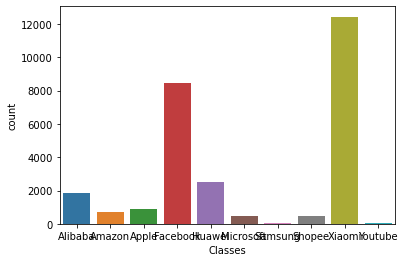

In [11]:
sns.countplot(x=traffic2['Classes'])

Classes
Alibaba       321.0
Amazon        117.0
Apple        1474.0
Facebook     1466.0
Huawei       1454.0
Microsoft     133.0
Samsung        42.0
Shopee        113.0
Xiaomi       1454.0
Youtube        86.0
Name: Length, dtype: float64

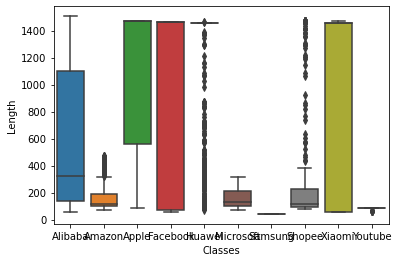

In [12]:
# The graph of length vs Classes
sns.boxplot(x='Classes', y='Length', data=traffic2)
traffic.groupby('Classes')['Length'].median()

In [13]:
# value inside classes column
traffic2.Classes.value_counts()

Xiaomi       12438
Facebook      8444
Huawei        2530
Alibaba       1838
Apple          881
Amazon         713
Microsoft      495
Shopee         454
Youtube         66
Samsung         62
Name: Classes, dtype: int64

In [14]:
X = traffic2.drop('Classes', axis = 1)
y = traffic2['Classes']

In [15]:
print('X: ', X.shape, 'y: ', y.shape) # preparing the data

X:  (27921, 4) y:  (27921,)


# Split Traning set and Test Set
## Split the data to 8:2

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('full set shape=', X.shape)
print('train shape=', X_train.shape)
print('test shape=', X_test.shape)

full set shape= (27921, 4)
train shape= (22336, 4)
test shape= (5585, 4)


# Split Numerical data and Categorical data for traning set

### For train set

In [17]:
X_train_num = X_train.drop(["Protocol","Info"],axis=1)
X_train_cat= X_train.drop(["Time","Length"],axis=1)
X_train_num.info()
X_train_cat.info()
#this is for the trainning set which using the protocol and infomation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22336 entries, 9064 to 23706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    22336 non-null  float64
 1   Length  22336 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 523.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22336 entries, 9064 to 23706
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Protocol  22336 non-null  object
 1   Info      22336 non-null  object
dtypes: object(2)
memory usage: 523.5+ KB


In [18]:
X_train_num.shape #(row,column)

(22336, 2)

In [19]:
X_train_cat.shape #giving the dimension of the array

(22336, 2)

### For test set

In [20]:
X_test_num = X_test.drop(["Protocol","Info"],axis=1)
X_test_cat = X_test.drop(["Time","Length"],axis=1)
X_test_num.info()
X_test_cat.info()
#this is for test set and also implement the protocol and infomation and also time and length

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5585 entries, 14627 to 24471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5585 non-null   float64
 1   Length  5585 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 130.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5585 entries, 14627 to 24471
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Protocol  5585 non-null   object
 1   Info      5585 non-null   object
dtypes: object(2)
memory usage: 130.9+ KB


# Standardization

In [21]:
# for the train set
# the mean and std scores is represented the accuracy of the function that being implemetned
traffic_scaler = StandardScaler()
traffic_scaler.fit(X_train_num)
X_train_num_tr = traffic_scaler.transform(X_train_num)
print('Mean of all columns:\n', X_train_num_tr.mean(axis=0))
print('Std of all columns:\n', X_train_num_tr.std(axis=0))

Mean of all columns:
 [-4.16731279e-17 -1.74963514e-17]
Std of all columns:
 [1. 1.]


In [22]:
X_train_num_tr

array([[-0.41112534, -1.22845695],
       [-0.38838021,  0.87650502],
       [-0.38935491,  0.87650502],
       ...,
       [ 0.12166499,  0.50601962],
       [-0.51466456,  0.88860251],
       [-0.42004073,  0.8583588 ]])

In [23]:
# for test set
traffic_scaler.fit(X_test_num)
X_test_num_tr = traffic_scaler.transform(X_test_num)
print('Mean of all columns:\n', X_test_num_tr.mean(axis=0))
print('Std of all columns:\n', X_test_num_tr.std(axis=0))

Mean of all columns:
 [-1.78112772e-17 -2.16279794e-17]
Std of all columns:
 [1. 1.]


# encoding the category data

In [24]:
# For train set 
# This step is to tranform the categorical data to numerical data
X_train_cat.info()
x2_cat = X_train_cat["Protocol"]
x3_cat = X_train_cat["Info"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22336 entries, 9064 to 23706
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Protocol  22336 non-null  object
 1   Info      22336 non-null  object
dtypes: object(2)
memory usage: 523.5+ KB


In [25]:
x2_cat.value_counts()
#show all the protocol for the model

TCP              13216
HTTP2             3792
TLSv1.2           2523
TLSv1.3           1643
DNS                961
ICMPv6              55
ARP                 40
HTTP2/JSON          39
OCSP                26
HTTP                15
HTTP2/XML           11
TLSv1                7
SSL                  3
QUIC                 2
HTTP3                2
HTTP2/XML/XML        1
Name: Protocol, dtype: int64

In [26]:
x3_cat.value_counts()
# this is the info for each packet from the website such as we can know that the ACK is requesting connection to the server
# and also the activities that perform by user during using the website 

Application Data                                                                                1377
[TLS segment of a reassembled PDU] [TCP segment of a reassembled PDU]                           1017
DATA[191][TLS segment of a reassembled PDU] [TCP segment of a reassembled PDU]                   828
Application Data, Application Data                                                               499
Application Data [TCP segment of a reassembled PDU]                                              368
                                                                                                ... 
HEADERS[31]: 304 Not Modified                                                                      1
443  >  49644 [ACK] Seq=5463068 Ack=3185 Win=302 Len=1400 [TCP segment of a reassembled PDU]       1
49644  >  443 [ACK] Seq=2415 Ack=1791150 Win=8279 Len=0                                            1
443  >  49644 [ACK] Seq=7990068 Ack=3269 Win=302 Len=1400 [TCP segment of a reassembled PDU

In [27]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
lb_encoder.fit(x2_cat)
x2_cat_tr = lb_encoder.transform(x2_cat)

lb_encoder = LabelEncoder()
lb_encoder.fit(x3_cat)
x3_cat_tr = lb_encoder.transform(x3_cat)
#this if for encoding the levels of cetegorical features into numeric values
# the label encoder is use for normalize labels and also tr

In [28]:
#combine all categories data column
X_train_cat_change = np.vstack([x2_cat_tr,x3_cat_tr])
X_train_cat_change

array([[   12,    12,    12, ...,    14,    12,    12],
       [ 8007,  6845,  7351, ..., 12719,  5818,  3972]])

In [29]:
X_train_cat_change.shape

(2, 22336)

In [30]:
traffic_scaler2 = StandardScaler()
traffic_scaler2.fit(X_train_cat_change)
X_train_cat_tr = traffic_scaler2.transform(X_train_cat_change)

In [31]:
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_tr.T])
X_train_tr.shape

(22336, 4)

In [32]:
y_train_tr = y_train.values

# for test set

In [33]:
x2_cat_test = X_test_cat["Protocol"]
x3_cat_test = X_test_cat["Info"]

In [34]:
x2_cat_test.value_counts()

TCP           3254
HTTP2         1017
TLSv1.2        631
TLSv1.3        383
DNS            247
ARP             22
ICMPv6          11
HTTP2/JSON       6
HTTP2/XML        5
OCSP             4
HTTP             2
TLSv1            2
SSL              1
Name: Protocol, dtype: int64

In [35]:
lb_encoder = LabelEncoder()
lb_encoder.fit(x2_cat_test)
x2_cat_test_tr = lb_encoder.transform(x2_cat_test)

lb_encoder = LabelEncoder()
lb_encoder.fit(x3_cat_test)
x3_cat_test_tr = lb_encoder.transform(x3_cat_test)

In [36]:
X_train_cat_change2 = np.vstack([x2_cat_test_tr,x3_cat_test_tr])
X_train_cat_change2

array([[   1,    9,    9, ...,   12,    9,    9],
       [3576,  362, 2025, ..., 3125, 2002, 1111]])

In [37]:
traffic_scaler3 = StandardScaler()
traffic_scaler3.fit(X_train_cat_change2)
X_train_test_cat_tr = traffic_scaler3.transform(X_train_cat_change2)

In [38]:
X_test_tr = np.hstack([X_test_num_tr, X_train_test_cat_tr.T])
X_test_tr.shape

(5585, 4)

In [39]:
y_test_tr = y_test.values
y_test_tr

array(['Microsoft', 'Xiaomi', 'Xiaomi', ..., 'Alibaba', 'Xiaomi',
       'Xiaomi'], dtype=object)

#  Traffic Classification

# Import library 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score

# Perform 2 types of classifier 

# 1. Logistic regression

In [41]:
# Training the with logistic regression
log_reg = LogisticRegression(C = 0.5, max_iter = 5000)
log_reg.fit(X_train_tr, y_train_tr)

# Predictions
y_pred_1 = log_reg.predict(X_train_tr)

print ("The accuracy of model 1 : ",accuracy_score(y_train_tr, y_pred_1))

The accuracy of model 1 :  0.5740060888252149


# 2. K-Nearest Neighbor (KNN)

In [42]:
# Training the KNN
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train_tr, y_train_tr)

# Predictions
y_pred_2 = KNN.predict(X_train_tr)

print ("The accuracy of model 2 : ",accuracy_score(y_train_tr, y_pred_2))

The accuracy of model 2 :  0.9631536532951289


The final classifier we implement is K-Nearest Neighbor as the output of KNN is provide higher accuracy

# Cross-validation

In [43]:
# We eliminate Logistic Regression for this project due to it is own a low accuracy
scores = cross_val_score(KNN, X_train_tr, y_train_tr, cv=20)
print('Cross-Validation Accuracy Scores:', scores)
print()
scores = pd.Series(scores)
print("Minimum score:",scores.min(),"\nMaximum Score:",scores.max(),"\nScore Mean:", scores.mean())

Cross-Validation Accuracy Scores: [0.94538944 0.95523724 0.93285586 0.94986571 0.94986571 0.94897046
 0.93285586 0.94180842 0.93912265 0.94180842 0.94449418 0.93106535
 0.94449418 0.95434199 0.95165622 0.94449418 0.94982079 0.95430108
 0.94802867 0.94265233]

Minimum score: 0.9310653536257834 
Maximum Score: 0.955237242614145 
Score Mean: 0.945156437012864


In [44]:
print ("The Confusion Matrix of KNN Algorithm:")
print (pd.DataFrame(confusion_matrix(y_train_tr, y_pred_2)))
print ()

The Confusion Matrix of KNN Algorithm:
      0    1    2     3     4    5   6    7     8   9
0  1400    4    2    17     2    9   0   16    33   2
1     4  542    0     1     0   16   0    2     8   2
2     5    3  664     8     9    4   0    0     0   0
3    26   25    0  6537     0    5   0   13   111   0
4     3    2   12     0  2009   10   0    0     0   0
5     4   36    0    17     5  313   0    9     2   0
6     2    0    1     3     1    7  15    0    11   0
7    30   38    3    29     3   19   0  211    16   1
8    35    7    0   122     0    9   0   16  9810   0
9    14    3    0     7     0    2   0    7    10  12

